In [78]:
%matplotlib inline

import numpy as np
import pandas as pd
import geopandas as gpd
import folium as fl
from folium.plugins import HeatMap, HeatMapWithTime
import matplotlib.pyplot as plt
import seaborn as sns
import os
from warnings import filterwarnings

filterwarnings('ignore')

In [79]:
# First we'll retrieve all the relevant csv files from the directory.
# Than we'll create a list of dataframes (one for each file) and concatenate
# them together in order to work on all the data at once.

data_files = os.listdir('csse_covid_19_data/csse_covid_19_daily_reports')
data_files = pd.Series(data_files, name='Data')
data_files = data_files[data_files.str.contains('.csv')]
data_files = data_files.sort_values()
data_files.head()

33    01-22-2020.csv
34    01-23-2020.csv
45    01-24-2020.csv
44    01-25-2020.csv
23    01-26-2020.csv
Name: Data, dtype: object

In [80]:
df_all = [pd.read_csv(f'csse_covid_19_data/csse_covid_19_daily_reports/{csv_file}') for csv_file in data_files]
len(df_all)

53

In [81]:
df = pd.concat(df_all)
df.reset_index(drop=True, inplace=True)
df

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Anhui,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN
1,Beijing,Mainland China,1/22/2020 17:00,14.0,NaN,NaN,NaN,NaN
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,NaN,NaN,NaN,NaN
3,Fujian,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN
4,Gansu,Mainland China,1/22/2020 17:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5627,"Virgin Islands, U.S.",US,2020-03-14T16:15:18,1.0,0.0,0.0,18.3358,-64.8963
5628,Gibraltar,United Kingdom,2020-03-14T16:33:03,1.0,0.0,1.0,36.1408,-5.3536
5629,From Diamond Princess,Australia,2020-03-14T02:33:04,0.0,0.0,0.0,35.4437,139.6380
5630,West Virginia,US,2020-03-10T02:33:04,0.0,0.0,0.0,38.4912,-80.9545


In [82]:
df['Last Update'] = pd.to_datetime(df['Last Update'])

df['Date Last Updated'] = df['Last Update'].dt.date
df['Time Last Updated'] = df['Last Update'].dt.time

df = df[['Province/State', 'Country/Region', 'Date Last Updated', 'Time Last Updated' ,'Confirmed', 'Deaths', 'Recovered', 'Latitude', 'Longitude']]
df

,Province/State,Country/Region,Date Last Updated,Time Last Updated,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Anhui,Mainland China,2020-01-22,17:00:00,1.0,NaN,NaN,NaN,NaN
1,Beijing,Mainland China,2020-01-22,17:00:00,14.0,NaN,NaN,NaN,NaN
2,Chongqing,Mainland China,2020-01-22,17:00:00,6.0,NaN,NaN,NaN,NaN
3,Fujian,Mainland China,2020-01-22,17:00:00,1.0,NaN,NaN,NaN,NaN
4,Gansu,Mainland China,2020-01-22,17:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5627,"Virgin Islands, U.S.",US,2020-03-14,16:15:18,1.0,0.0,0.0,18.3358,-64.8963
5628,Gibraltar,United Kingdom,2020-03-14,16:33:03,1.0,0.0,1.0,36.1408,-5.3536
5629,From Diamond Princess,Australia,2020-03-14,02:33:04,0.0,0.0,0.0,35.4437,139.6380
5630,West Virginia,US,2020-03-10,02:33:04,0.0,0.0,0.0,38.4912,-80.9545


In [83]:
df.isnull().sum()

Province/State       2176
Country/Region          0
Date Last Updated       0
Time Last Updated       0
Confirmed              19
Deaths                441
Recovered             388
Latitude             2818
Longitude            2818
dtype: int64

In [84]:
world_wide = df.groupby('Date Last Updated').sum().copy()
world_wide.drop(columns=['Latitude', 'Longitude'], inplace=True)
# world_wide.reset_index(inplace=True)
world_wide.head()

,Confirmed,Deaths,Recovered
Date Last Updated,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


In [85]:
world_wide.isnull().sum()

Confirmed    0
Deaths       0
Recovered    0
dtype: int64

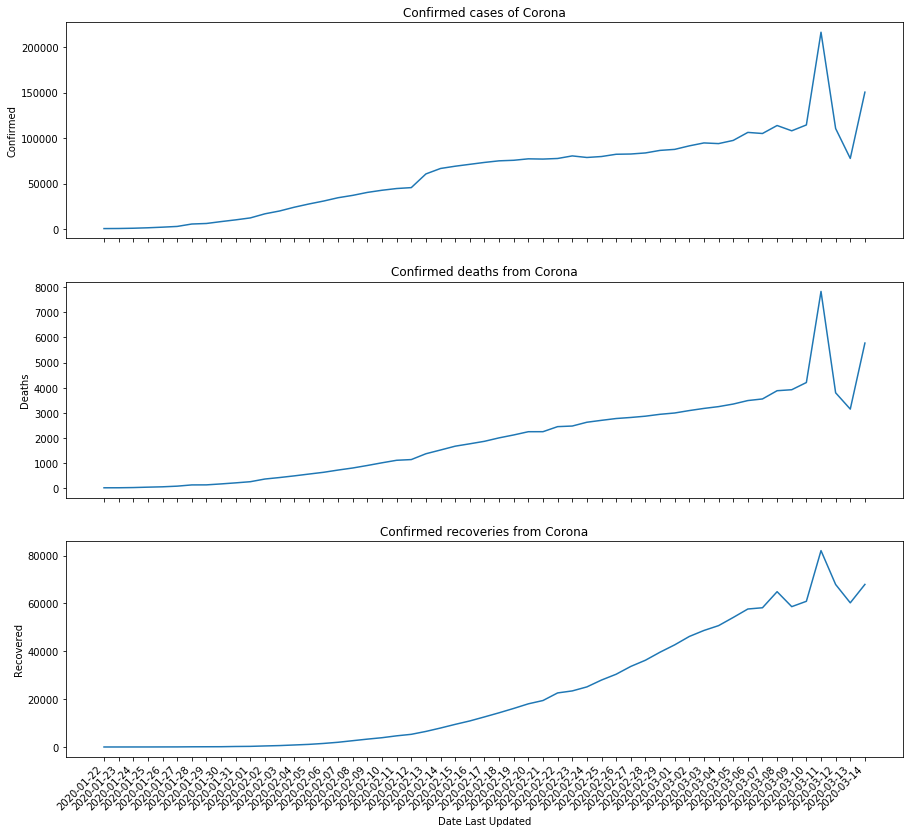

In [86]:
fig, axes = plt.subplots(3,1, figsize=(15,15))
fig.autofmt_xdate(rotation=45)

sns.lineplot(x=world_wide.index, y='Confirmed', data=world_wide, ax=axes[0])
axes[0].xaxis.set_ticks(world_wide.index)
axes[0].set_title('Confirmed cases of Corona')

sns.lineplot(x=world_wide.index, y='Deaths', data=world_wide, ax=axes[1])
axes[1].xaxis.set_ticks(world_wide.index)
axes[1].set_title('Confirmed deaths from Corona')

sns.lineplot(x=world_wide.index, y='Recovered', data=world_wide, ax=axes[2])
axes[2].xaxis.set_ticks(world_wide.index);
axes[2].set_title('Confirmed recoveries from Corona');

## Track the growth by country

In [87]:
country_counts = df['Country/Region'].value_counts().to_dict()

for country in sorted(country_counts.keys()):
    print(country, country_counts[country])

 Azerbaijan 1
Afghanistan 20
Albania 6
Algeria 19
Andorra 13
Antigua and Barbuda 2
Argentina 12
Armenia 14
Aruba 2
Australia 251
Austria 19
Azerbaijan 14
Bahrain 20
Bangladesh 7
Belarus 16
Belgium 40
Bhutan 9
Bolivia 4
Bosnia and Herzegovina 10
Brazil 19
Brunei 6
Bulgaria 7
Burkina Faso 5
Cambodia 48
Cameroon 9
Canada 166
Cayman Islands 2
Channel Islands 1
Chile 12
China 132
Colombia 10
Congo (Kinshasa) 4
Costa Rica 9
Cote d'Ivoire 4
Croatia 19
Cruise Ship 4
Cuba 3
Curacao 1
Cyprus 6
Czech Republic 10
Czechia 4
Denmark 21
Dominican Republic 14
Ecuador 14
Egypt 30
Estonia 17
Eswatini 1
Ethiopia 2
Faroe Islands 7
Finland 46
France 62
French Guiana 8
Gabon 1
Georgia 18
Germany 47
Ghana 1
Gibraltar 7
Greece 18
Guadeloupe 2
Guatemala 1
Guernsey 1
Guinea 2
Guyana 3
Holy See 5
Honduras 4
Hong Kong 48
Hong Kong SAR 1
Hungary 11
Iceland 16
India 45
Indonesia 13
Iran 24
Iran (Islamic Republic of) 1
Iraq 21
Ireland 15
Israel 23
Italy 44
Ivory Coast 1
Jamaica 4
Japan 53
Jersey 1
Jordan 12
Kazakhst

In [88]:
US = df[df['Country/Region']  == 'US']
US

,Province/State,Country/Region,Date Last Updated,Time Last Updated,Confirmed,Deaths,Recovered,Latitude,Longitude
31,Washington,US,2020-01-22,17:00:00,1.0,NaN,NaN,NaN,NaN
69,Washington,US,2020-01-23,17:00:00,1.0,NaN,NaN,NaN,NaN
117,Washington,US,2020-01-24,17:00:00,1.0,NaN,NaN,NaN,NaN
118,Chicago,US,2020-01-24,17:00:00,1.0,NaN,NaN,NaN,NaN
158,Washington,US,2020-01-25,17:00:00,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5591,Idaho,US,2020-03-14,22:33:03,2.0,0.0,0.0,44.2405,-114.4788
5592,Wyoming,US,2020-03-14,16:53:03,2.0,0.0,0.0,42.7560,-107.3025
5626,North Dakota,US,2020-03-12,09:33:03,1.0,0.0,0.0,47.5289,-99.7840
5627,"Virgin Islands, U.S.",US,2020-03-14,16:15:18,1.0,0.0,0.0,18.3358,-64.8963


In [89]:
US = gpd.GeoDataFrame(US, geometry=gpd.points_from_xy(US['Longitude'], US['Latitude']))
US.crs = {'init' :'epsg:4326'}
US

,Province/State,Country/Region,Date Last Updated,Time Last Updated,Confirmed,Deaths,Recovered,Latitude,Longitude,geometry
31,Washington,US,2020-01-22,17:00:00,1.0,NaN,NaN,NaN,NaN,POINT (nan nan)
69,Washington,US,2020-01-23,17:00:00,1.0,NaN,NaN,NaN,NaN,POINT (nan nan)
117,Washington,US,2020-01-24,17:00:00,1.0,NaN,NaN,NaN,NaN,POINT (nan nan)
118,Chicago,US,2020-01-24,17:00:00,1.0,NaN,NaN,NaN,NaN,POINT (nan nan)
158,Washington,US,2020-01-25,17:00:00,1.0,NaN,NaN,NaN,NaN,POINT (nan nan)
...,...,...,...,...,...,...,...,...,...,...
5591,Idaho,US,2020-03-14,22:33:03,2.0,0.0,0.0,44.2405,-114.4788,POINT (-114.479 44.240)
5592,Wyoming,US,2020-03-14,16:53:03,2.0,0.0,0.0,42.7560,-107.3025,POINT (-107.302 42.756)
5626,North Dakota,US,2020-03-12,09:33:03,1.0,0.0,0.0,47.5289,-99.7840,POINT (-99.784 47.529)
5627,"Virgin Islands, U.S.",US,2020-03-14,16:15:18,1.0,0.0,0.0,18.3358,-64.8963,POINT (-64.896 18.336)


In [91]:
US = US[~US['Province/State'].isin(['Puerto Rico', 'Virgin Islands, U.S.'])]
US

,Province/State,Country/Region,Date Last Updated,Time Last Updated,Confirmed,Deaths,Recovered,Latitude,Longitude,geometry
31,Washington,US,2020-01-22,17:00:00,1.0,NaN,NaN,NaN,NaN,POINT (nan nan)
69,Washington,US,2020-01-23,17:00:00,1.0,NaN,NaN,NaN,NaN,POINT (nan nan)
117,Washington,US,2020-01-24,17:00:00,1.0,NaN,NaN,NaN,NaN,POINT (nan nan)
118,Chicago,US,2020-01-24,17:00:00,1.0,NaN,NaN,NaN,NaN,POINT (nan nan)
158,Washington,US,2020-01-25,17:00:00,1.0,NaN,NaN,NaN,NaN,POINT (nan nan)
...,...,...,...,...,...,...,...,...,...,...
5575,Maine,US,2020-03-14,16:53:03,3.0,0.0,0.0,44.6939,-69.3819,POINT (-69.382 44.694)
5591,Idaho,US,2020-03-14,22:33:03,2.0,0.0,0.0,44.2405,-114.4788,POINT (-114.479 44.240)
5592,Wyoming,US,2020-03-14,16:53:03,2.0,0.0,0.0,42.7560,-107.3025,POINT (-107.302 42.756)
5626,North Dakota,US,2020-03-12,09:33:03,1.0,0.0,0.0,47.5289,-99.7840,POINT (-99.784 47.529)


In [92]:
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
us_states = gpd.read_file('US_map.json')
us_states.tail()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
47,0400000US53,53,Washington,,66455.521,"MULTIPOLYGON (((-122.51954 48.28831, -122.5227..."
48,0400000US54,54,West Virginia,,24038.210,"POLYGON ((-80.07595 39.72135, -79.91617 39.720..."
49,0400000US55,55,Wisconsin,,54157.805,"MULTIPOLYGON (((-90.40331 47.02669, -90.40332 ..."
50,0400000US56,56,Wyoming,,97093.141,"POLYGON ((-110.04848 40.99755, -110.12164 40.9..."
51,0400000US72,72,Puerto Rico,,3423.775,"MULTIPOLYGON (((-65.32770 18.29584, -65.33745 ..."


In [93]:
us_states = us_states[us_states['NAME'].isin(['Puerto Rico']) == False]
us_states.tail()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
46,0400000US51,51,Virginia,,39490.086,"MULTIPOLYGON (((-75.97361 37.83582, -75.97171 ..."
47,0400000US53,53,Washington,,66455.521,"MULTIPOLYGON (((-122.51954 48.28831, -122.5227..."
48,0400000US54,54,West Virginia,,24038.210,"POLYGON ((-80.07595 39.72135, -79.91617 39.720..."
49,0400000US55,55,Wisconsin,,54157.805,"MULTIPOLYGON (((-90.40331 47.02669, -90.40332 ..."
50,0400000US56,56,Wyoming,,97093.141,"POLYGON ((-110.04848 40.99755, -110.12164 40.9..."


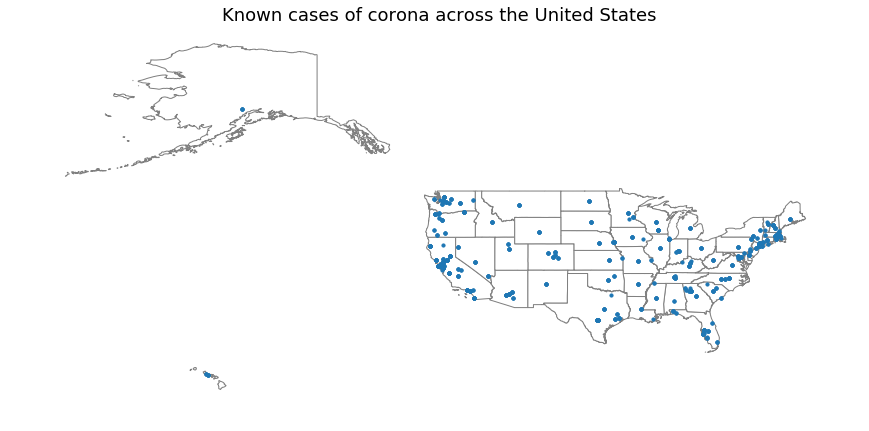

In [94]:
ax = us_states.plot(figsize=(20,7), color='white', edgecolor='gray')
ax.set_xlim([-185, -60])
ax.set_title('Known cases of corona across the United States', fontsize=18)
ax.set_axis_off()
US.plot(ax=ax, markersize=10)
plt.show()

In [114]:
# Use this function to make sure every web-browser 
# can display the map
def embed_map(m, file_name):
    from IPython.display import IFrame
    m.save(file_name)
    return IFrame(file_name, width='100%', height='500px')

In [115]:
m = fl.Map((50, -95.7129), zoom_start=3)
HeatMap(US.dropna()[['Latitude', 'Longitude']], radius=15).add_to(m)

print('\t\t\t\tHeatmap of cases of cornona across the US')
embed_map(m, 'heatmap_us.html')

				Heatmap of cases of cornona across the US


In [51]:
US = US.groupby('Province/State')

us_groups = pd.Series(sorted(US.groups.keys()), name='US groups')
us_groups.head()

0     Norfolk County, MA
1                Alabama
2     Alameda County, CA
3                 Alaska
4                Arizona
Name: US groups, dtype: object

In [52]:
# We now can look at all the dataframes pertaining to California
california_groups = us_groups[us_groups.str.contains('(CA|California)')]
california_groups

2                      Alameda County, CA
9                            Berkeley, CA
13                             California
27                Contra Costa County, CA
46                      Fresno County, CA
61                    Humboldt County, CA
81                        Los Angeles, CA
83                      Madera County, CA
118                     Orange County, CA
119                            Orange, CA
124                     Placer County, CA
133                  Riverside County, CA
136                 Sacramento County, CA
138                        San Benito, CA
139                  San Diego County, CA
140              San Francisco County, CA
141                         San Mateo, CA
142                Santa Clara County, CA
143                       Santa Clara, CA
144                 Santa Cruz County, CA
149                     Shasta County, CA
152                     Sonoma County, CA
164                            Travis, CA
165    Travis, CA (From Diamond Pr

In [53]:
california = [US.get_group(group) for group in california_groups]
california = pd.concat(california)
california

,Province/State,Country/Region,Date Last Updated,Time Last Updated,Confirmed,Deaths,Recovered,Latitude,Longitude,geometry
3904,"Alameda County, CA",US,2020-03-07,13:13:14,2.0,0.0,0.0,37.6017,-121.7195,POINT (-121.71950 37.60170)
4149,"Alameda County, CA",US,2020-03-07,13:13:14,2.0,0.0,0.0,37.6017,-121.7195,POINT (-121.71950 37.60170)
4413,"Alameda County, CA",US,2020-03-07,13:13:14,2.0,0.0,0.0,37.6017,-121.7195,POINT (-121.71950 37.60170)
3214,"Berkeley, CA",US,2020-03-03,23:53:03,1.0,0.0,0.0,37.8715,-122.2730,POINT (-122.27300 37.87150)
3377,"Berkeley, CA",US,2020-03-03,23:53:03,1.0,0.0,0.0,37.8715,-122.2730,POINT (-122.27300 37.87150)
...,...,...,...,...,...,...,...,...,...,...
4512,"Travis, CA (From Diamond Princess)",US,2020-02-24,23:33:02,0.0,0.0,0.0,38.2721,-121.9399,POINT (-121.93990 38.27210)
3759,"Yolo County, CA",US,2020-03-06,20:13:14,1.0,0.0,0.0,38.7646,-121.9018,POINT (-121.90180 38.76460)
3983,"Yolo County, CA",US,2020-03-06,20:13:14,1.0,0.0,0.0,38.7646,-121.9018,POINT (-121.90180 38.76460)
4238,"Yolo County, CA",US,2020-03-06,20:13:14,1.0,0.0,0.0,38.7646,-121.9018,POINT (-121.90180 38.76460)
